This is the second in the series. We will learn more about time series relying on <a href=https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python> this article </a> as a source.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Points of Note

## Time Series Components
Our source defines the useful components of a time series as:
- Trend
- Seasonality
- Cyclical Component
- Irregular Variation
- ETS decomposition

## Types of Data
- Time Series (Purely)
- Cross Sectional (More variables collected at the same time)
- Pooled (Combination of the former two)

## Further Terms
> **Differencing** - Differencing is used to make the series stationary and to control the auto-correlations.

> **Exponential Smoothing** - Predicts the one next period value based on the past and current value.

# Analysis

## Preprocessing

In [4]:
df = pd.read_csv("./data/archive/AirPassengers.csv")

In [5]:
# Renaming columns
df.columns = ['Date','Number of Passengers']
df.head(2)

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118


In [7]:
df.Date = pd.to_datetime(df.Date)
df.head(2)

,Date,Number of Passengers
0,1949-01-01,112
1,1949-02-01,118


## Visualization

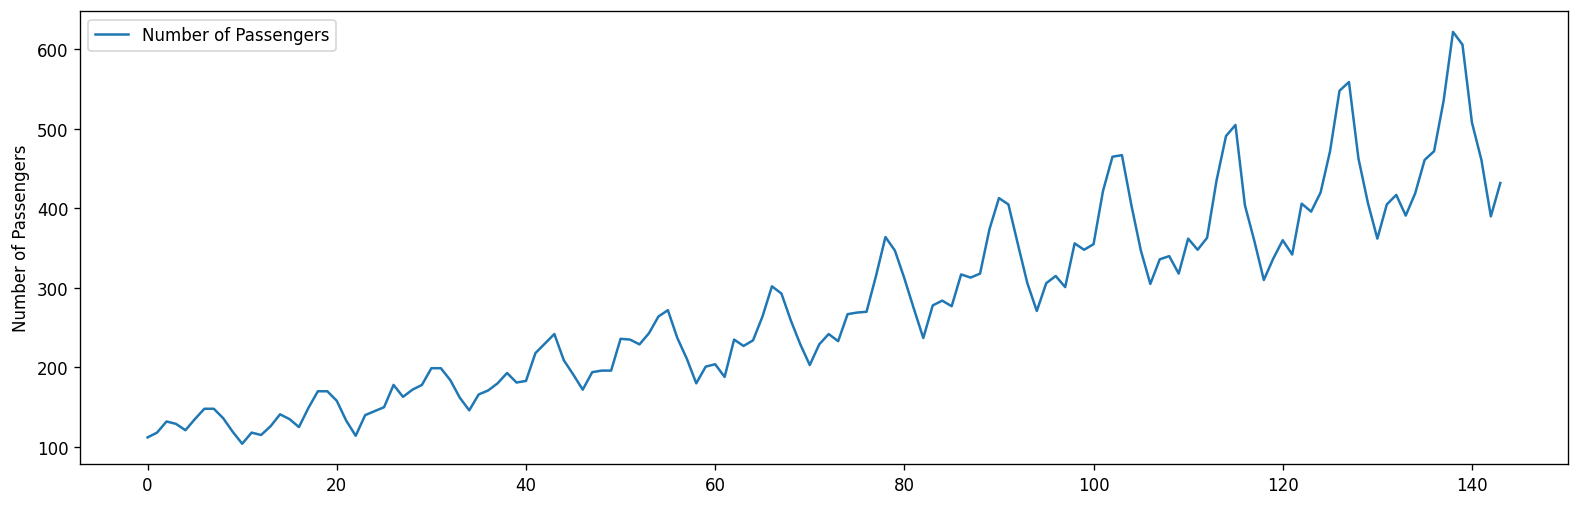

In [12]:
plt.figure(figsize=(16,5), dpi= 120)
sns.lineplot(df)
plt.ylabel('Number of Passengers')
plt.show()

Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

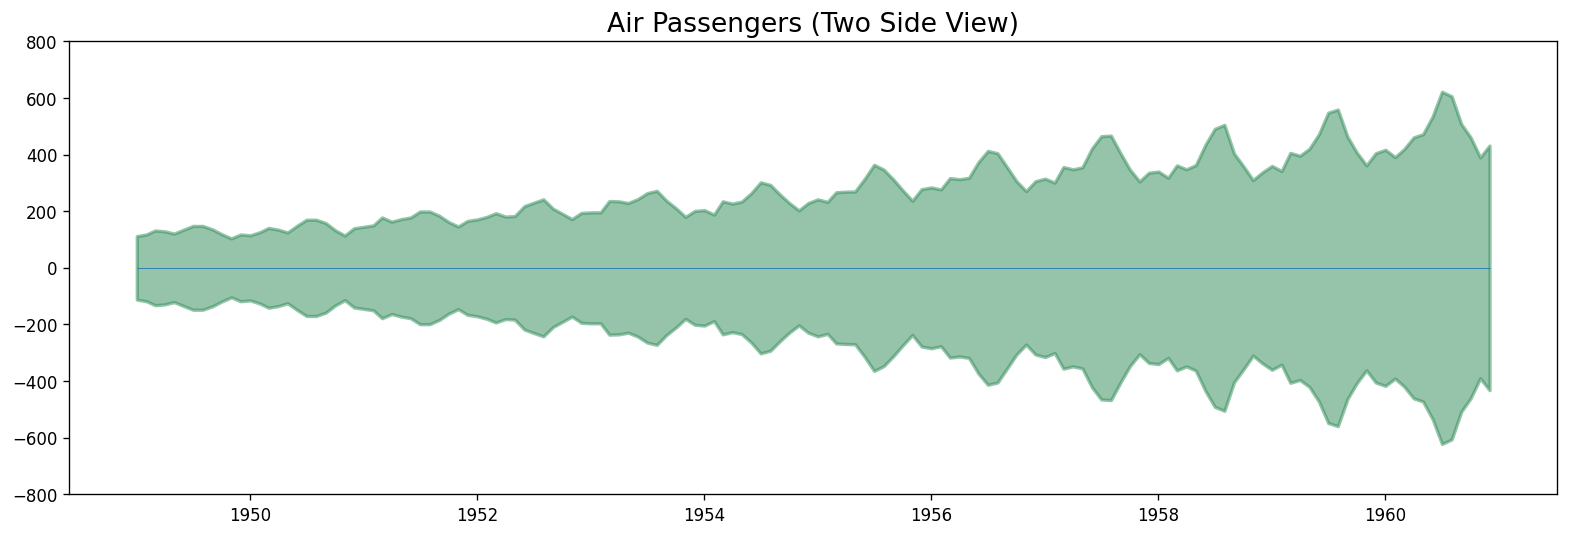

In [10]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

# Time Series Patterns
Here we go on to greater lengths on the components of a time series.

## Seasonality
> A seasonality is observed when there is a distinct repeated pattern observed between `regular` intervals due to seasonal factors.

## Cyclical Behaviour
> This happens when the rise and fall pattern in the series happens in `irregular` intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.

# Additive and Multiplicative Time Series
A time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components
<table>
    <tr>
        <td> Additive time series </td>
        <td> Multiplicative Time Series </td>
    </tr>
    <tr>
        <td> Value = Base Level + Trend + Seasonality + Error </td>
        <td> Value = Base Level x Trend x Seasonality x Error </td>
    </tr>
</table>

# Decomposition
Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [14]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

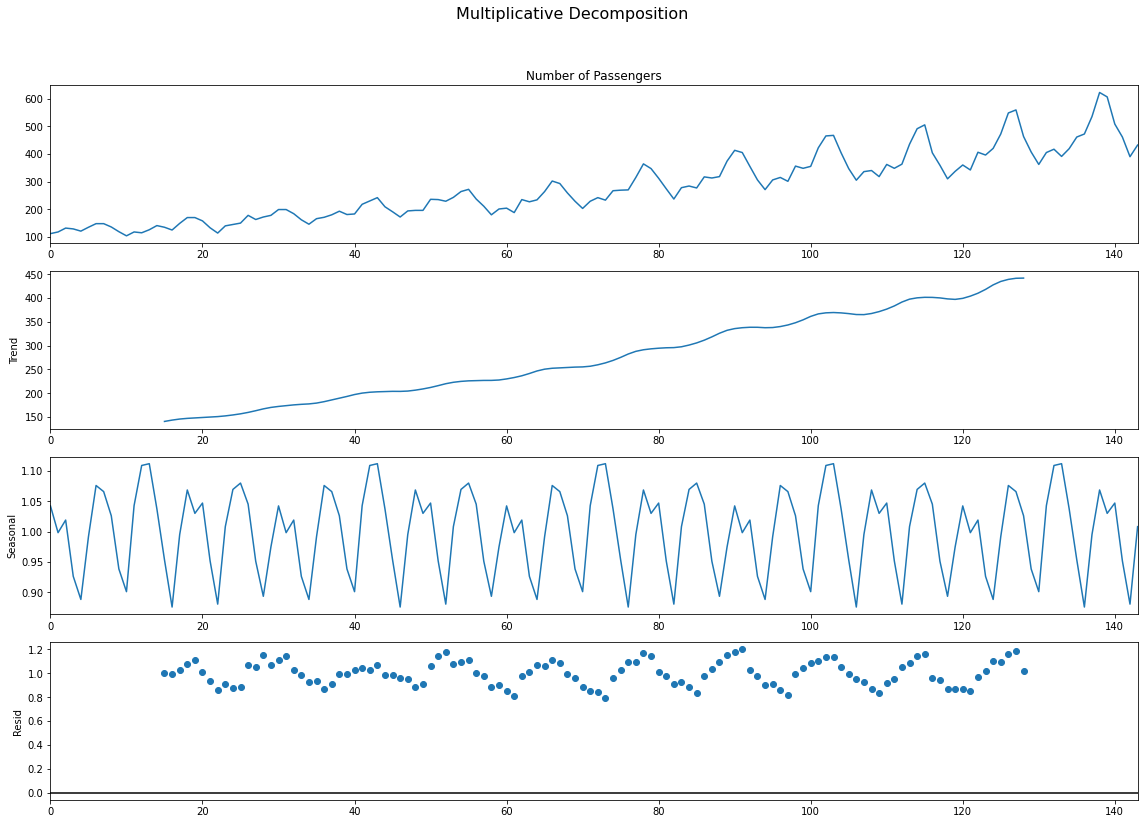

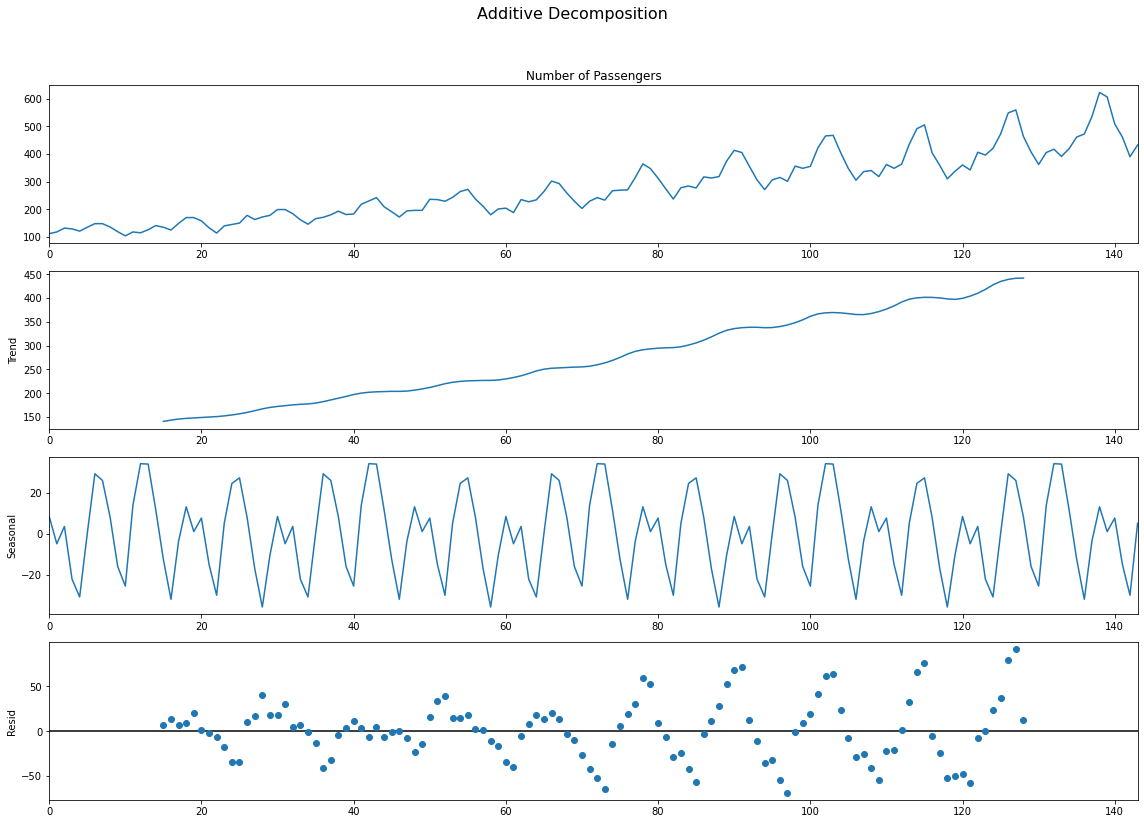

In [15]:
# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## Conclusion
> If we look at the residuals of the additive decomposition closely, it has some pattern left over.

> The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

# Stationarity
A stationary series is one where the values of the series is not a function of time. So, the values are `independent of time`. 

Hence the statistical properties of the series like mean, variance and autocorrelation are `constant` over time. 

## Non-stationary to Stationary Transformations
We can covert any non-stationary time series into a stationary one by applying a suitable transformation. 

We do this by applying the following transformations
1. `Differencing` the Series (once or more)
2. Take the `log` of the series
3. Take the `nth root` of the series
4. Combination of the above

## Differencing

### Introduction
In simpler terms, differencing the series is nothing but subtracting the next value by the current value.

$$ y = y_{t} - (y_{t-n}) $$

Where n is the nth difference (how many time steps back from the current)

We start with the 1st difference and if the first difference doesn’t make a series stationary, we can go for the second differencing and so on.

### Test for Stationarity
This can be done using statistical tests called Unit Root Tests. This test checks if a time series is non-stationary and possess a unit root.
Several techniques exist:
1. Augmented Dickey Fuller test (ADF Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3. Philips Perron test (PP Test)

#### Augmented Dickey Fuller test or (ADF Test)
Here, we assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis.

#### Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
Used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. As noted in <a href=https://en.wikipedia.org/wiki/KPSS_test> wikipedia </a>
>  the absence of a unit root is not a proof of stationarity but, by design, of trend-stationarity. This is an important distinction since it is possible for a time series to be non-stationary, have no unit root yet be trend-stationary. 

#### Philips Perron test (PP Test) 
Used in the time series analysis to test the null hypothesis that a time series is integrated of order 1. It is built on the ADF test discussed above.

## White Noise
This may look like a stationary series because of constant mean and variance. The plot below shows how it can look deceptively similar.

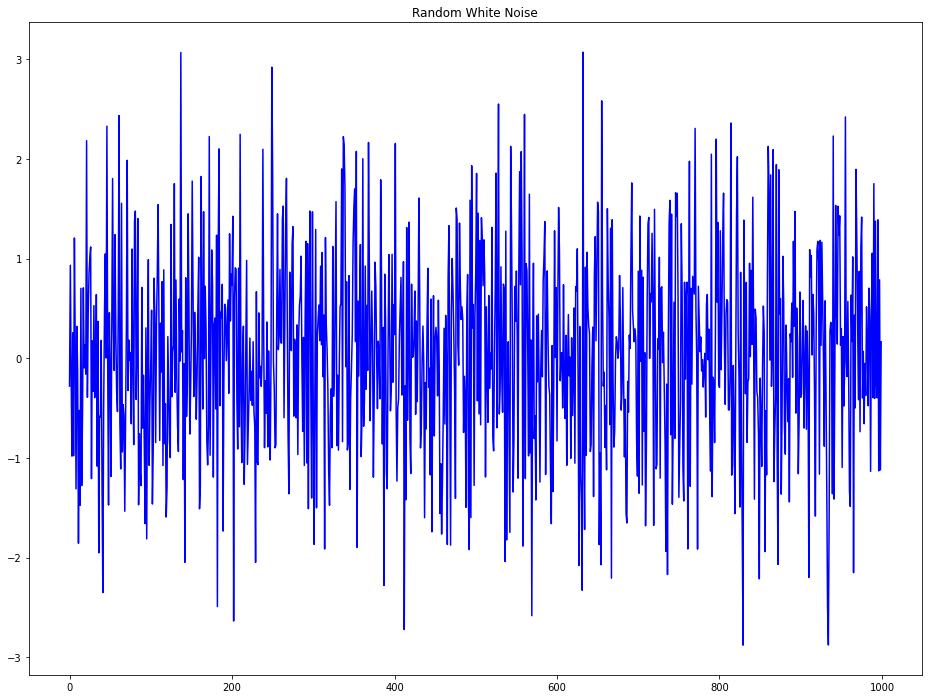

In [17]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')
plt.show()

The difference is that white noise is completely random with a mean of 0. In white noise there is no pattern.

## Detrending
Detrending a time series means to remove the trend component from the time series. There are several techniques for this.

### Subtract the line of best fit from the time series.

In [18]:
from scipy import signal

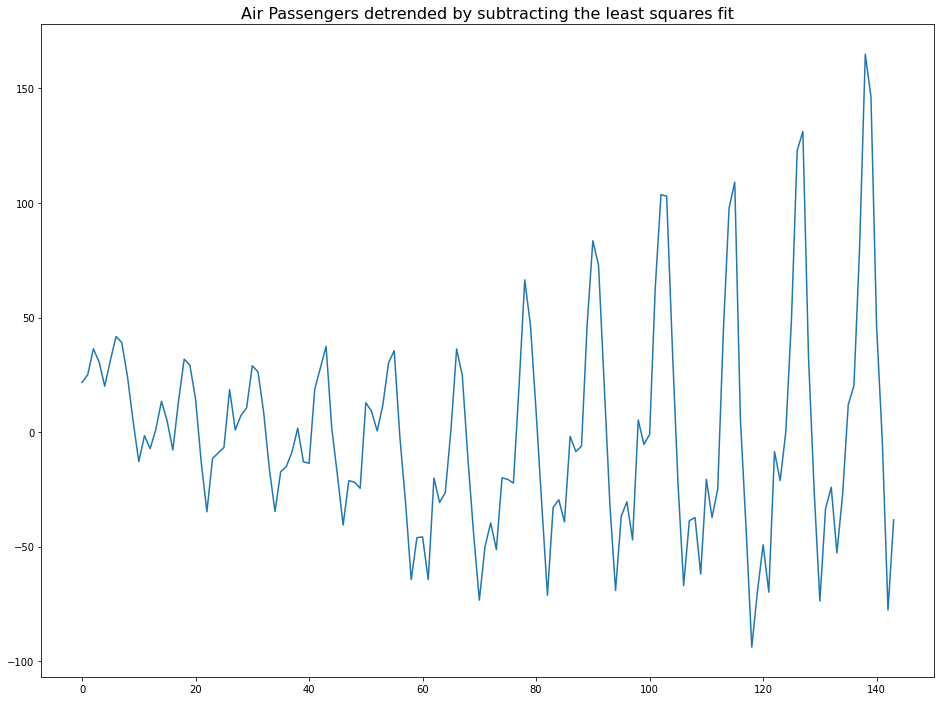

In [20]:
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)
plt.show()

### Subtract the trend component obtained from time series decomposition.

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

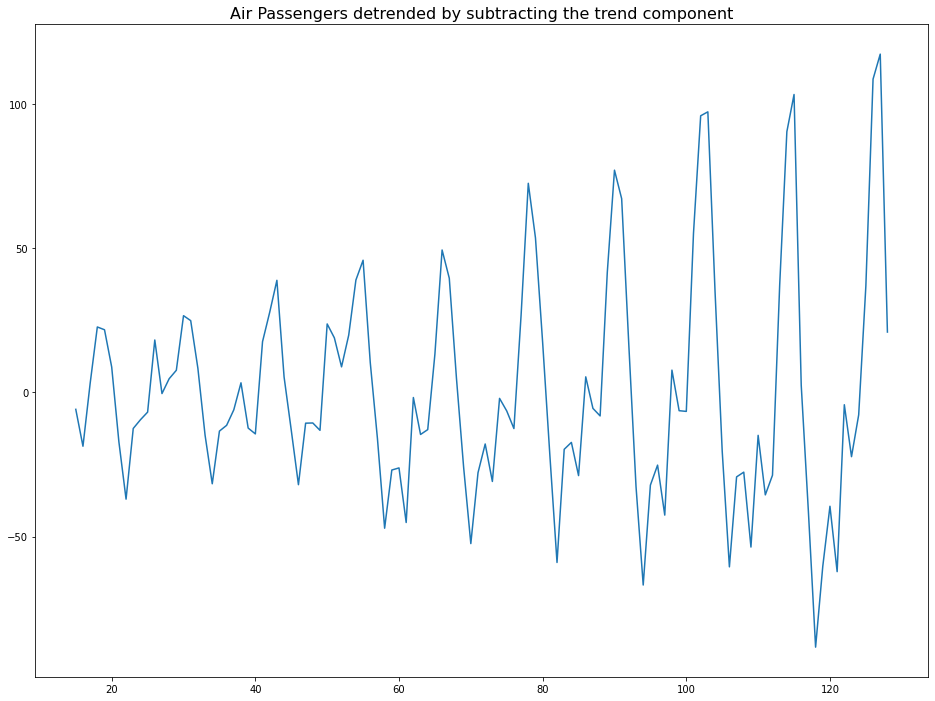

In [22]:
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)
plt.show()

### Subtracting the Mean

In [24]:
# Calculate the mean
mean_value = df['Number of Passengers'].mean()

# Detrend the time series by subtracting the mean
detrended = df['Number of Passengers'] - mean_value

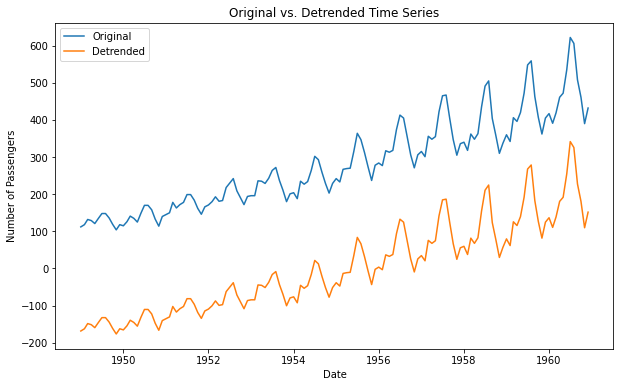

In [25]:
# Plot the original and detrended time series
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Number of Passengers'], label='Original')
plt.plot(df['Date'], detrended, label='Detrended')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Original vs. Detrended Time Series')
plt.legend()
plt.show()

## Seasonality

### Test for Seasonality
We use the Autocorrelation Function `(ACF) plot`. There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

In [35]:
from pandas.plotting import autocorrelation_plot

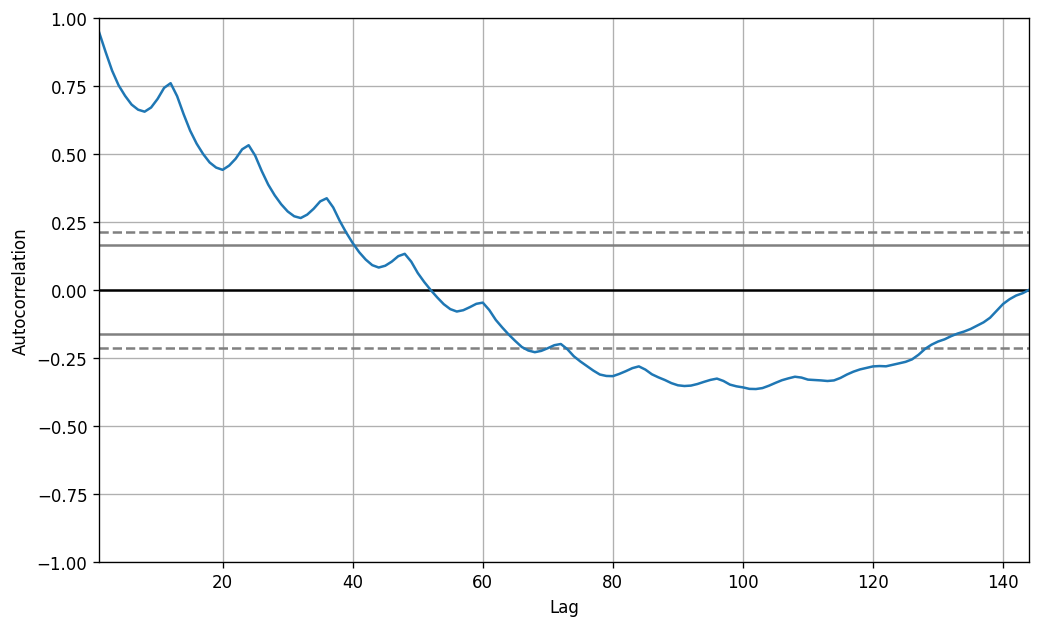

In [38]:
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())
plt.show()

### Deseasonality
There are multiple approaches as listed below:

1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

2. Seasonal difference the series (subtract the value of previous season from the current value).

3. Divide the series by the seasonal index obtained from STL decomposition.

[]

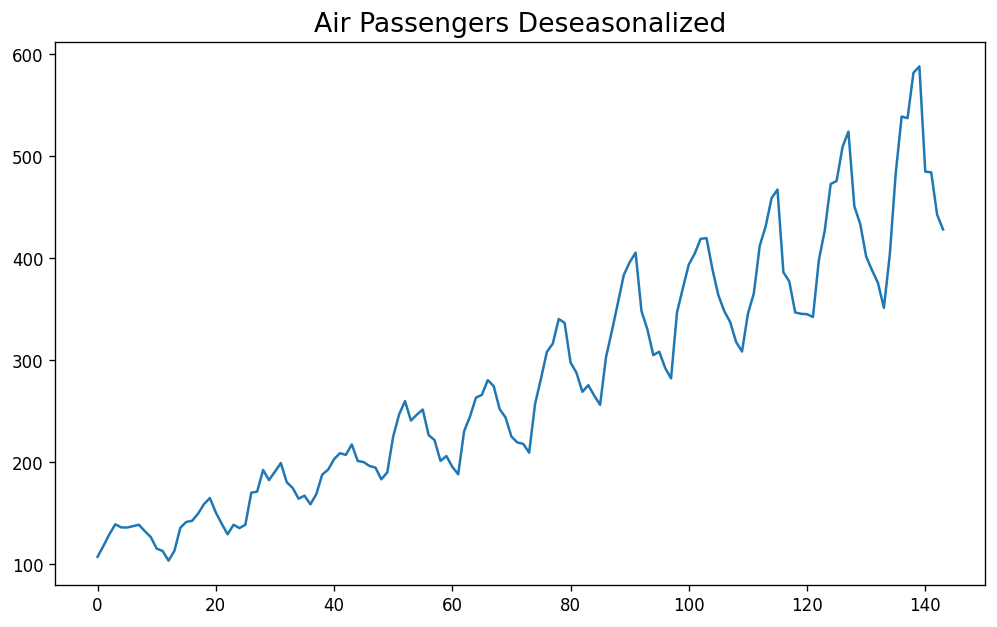

In [39]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Number of Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

# Autocorrelation

> This is simply the correlation of a series with its own lags. 
If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

> `Partial Autocorrelation` also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

In [40]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


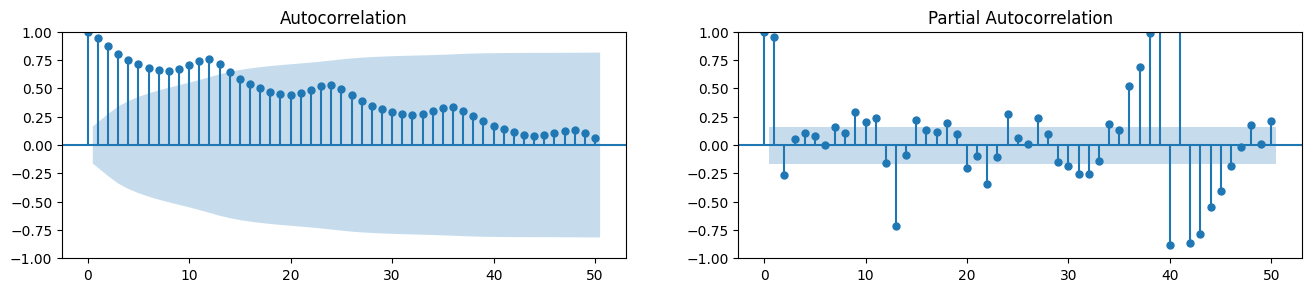

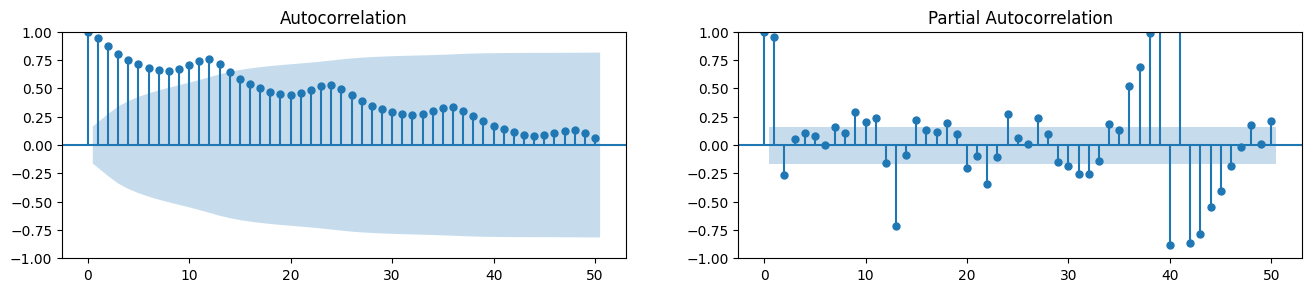

In [41]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

## Partial Autocorrelation Function
The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

$$
y = a_0 + b_1Y_{t-1} + a_2Y_{t-2} + ...
$$


## Lag Plots
> A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is `any pattern` existing in the series, the series is `autocorrelated`. If there is no such pattern, the series is likely to be random white noise.

In [43]:
from pandas.plotting import lag_plot

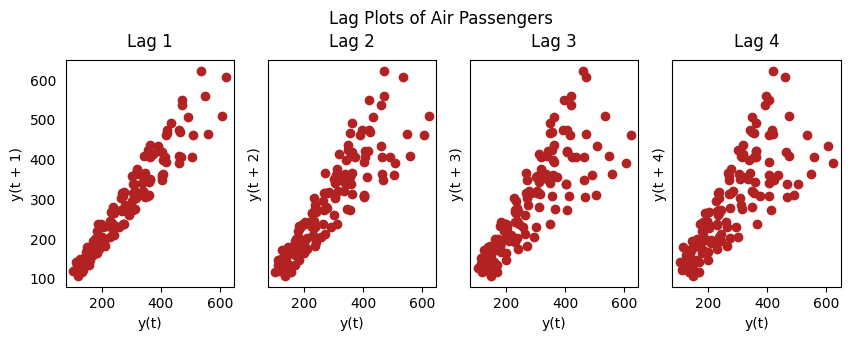

In [44]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

### Conclusion
This shows a pattern and therefore an autocorrelation.

## Granger Causality Test
> Used to determine if one time series will be useful to forecast another. It is generally used on exogenous (not Y lag) variables only.

> The Null hypothesis is that the series in the second column, does not Granger cause the series in the first. 

In [45]:
from statsmodels.tsa.stattools import grangercausalitytests

In [48]:
df.head()

,Date,Number of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [51]:
df['month'] = df.Date.dt.month
grangercausalitytests(df[['Number of Passengers', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4080  , p=0.0073  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=7.5667  , p=0.0059  , df=1
likelihood ratio test: chi2=7.3733  , p=0.0066  , df=1
parameter F test:         F=7.4080  , p=0.0073  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9761  , p=0.0082  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=10.3154 , p=0.0058  , df=2
likelihood ratio test: chi2=9.9579  , p=0.0069  , df=2
parameter F test:         F=4.9761  , p=0.0082  , df_denom=137, df_num=2


{1: ({'ssr_ftest': (7.4079677620772735, 0.0073188447316325424, 140.0, 1),
   'ssr_chi2test': (7.566709928407501, 0.005945621865036029, 1),
   'lrtest': (7.373310381387228, 0.00661989587473731, 1),
   'params_ftest': (7.407967762077291, 0.00731884473163248, 140.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.976083922906419, 0.00819979590267596, 137.0, 2),
   'ssr_chi2test': (10.315385650404547, 0.005754962083917532, 2),
   'lrtest': (9.957923125859224, 0.006881204546491387, 2),
   'params_ftest': (4.976083922906463, 0.008199795902675555, 137.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

# Smoothening a Time Series

## Reasons
- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better.

## Techniques
- Take a moving average

    Moving average is the average of a rolling window of defined width. 
- Do a LOESS smoothing (Localized Regression)

    Fits multiple regressions in the local neighborhood of each point. 
- Do a LOWESS smoothing (Locally Weighted Regression)